<h1>STOR601 Assignment - Jarvis-March Algorithm

This is a Jupyter Notebook containing: 
<ol>
<li>Pseudocode for the Jarvis-March algorithm
<li>Analysis/comparison of different versions of pseudocode
<li>The Jarvis-March algorithm
<li>An evaluation of the computational complexity of application of the algorithm
<li>Possible improvements to the algorithm
<li>Required Dataset examples
<li>Edge cases, e.g. collinear points or one point
<li>Benchmarking code - timing/pathological worst cases
<li>Review of the algorithm considering the 5Rs
</ol>

<h2>Pseudocode for the Jarvis March algorithm

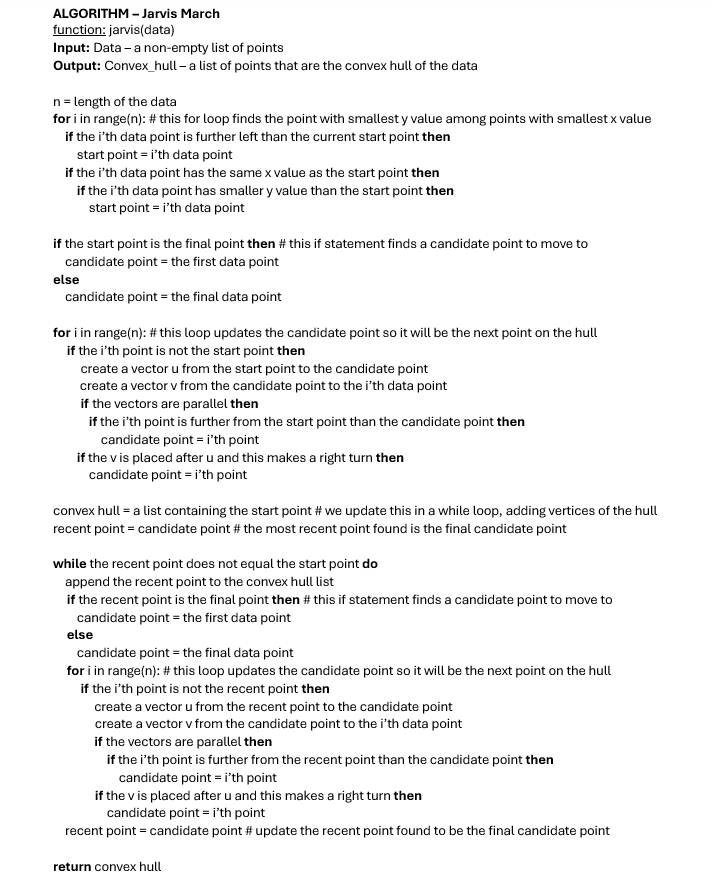

<h2> Analysis/comparison of different versions of pseudocode

Pros of pseudocode from the task description: 

1) Faster to read
2) Fewer details make it easier to digest/less intense to read
3) Gives a more general overview of the problem, it is easier to understand the overall method of the algorithm
4) The intention of the algorithm is more immediately clear, however it is not hard to understand the intention of the algorithm given the longer pseudocode either

Pros of longer, more journal like pseudocode:

1) Provides a more in depth explanation of how the algorithm will work, going into more detail on specific steps
2) This pseudocode is easier/faster to turn into real code because the structure is more clear e.g. where to put most of the if/while/for loops
3) The intention of each step of the algorithm is clearer

Pros of pseudocode in general (as opposed to actual code): 

1) Much easier to read than actual code, even if the code has comments
2) Much easier to write than actual code. 

<h2> The Jarvis March algorithm Implementation

In a similar manner to Wikipedia: https://en.wikipedia.org/wiki/Convex_hull, let $X = \{x_{1},...,x_{n}\}$ be a set of $n$ points in Euclidean space. We define a set to be convex if for all pairs of points $(a,b)$ with $a,b \in X$, the line segment from $a$ to $b$ is contained within the set. 

Also as in Wikipedia: https://en.wikipedia.org/wiki/Convex_hull, we define a convex hull of $X$ to be "the (unique) minimal convex set containing $X$". 

In 2 dimensional Euclidean space, the convex hull has a boundary which is a sequence of points connected by line segments. The Jarvis March algorithm will allow us to find this set of points, which uniquely defines the hull. 

In [1]:
#uncomment and install if you do not have these packages
#!python3 -m pip install sortedcontainers
#!python3 -m pip install plotnine

In [2]:
# we create a class to be used for points in the (x,y) plane
# we implement this class outside the function so the output of the function (a list of points) can easily be used
# this class contains methods to 1) add points 2) print points 3) compute the euclidean distance between 2 points
class point :
    x = None
    y = None
    def add(a,b) : # creates a new point which is the sum of the two previous points (adding coordinates pointwise)
        c = point()
        c.x = a.x + b.x
        c.y = a.y = b.y
        return  c
    
    def __init__(self,x = 0.0,y = 0.0) :
        self.x = x
        self.y = y
    
    def edist(a,b) : # a method to compute the euclidean distance between 2 points
        d = ((a.x - b.x)**2 + (a.y - b.y)**2)**0.5 
        return d

In [22]:
# the following implementation of the jarvis-march algorithm uses a similar method as in
# https://algorithmtutor.com/Computational-Geometry/Convex-Hull-Algorithms-Jarvis-s-March/
# when finding subsequent points on the hull (using the cross product).\
# first we find an initial point on the hull
# then we take a candidate point and check if other points turn to the right (negative cross product)
# and then if they do, they become the candidate point until we have checked all points and therefore found
# the next point (the final candidate point) which is the next point on the hull moving counter clockwise. 
# this continues until we return to the start vertex on the hull. 

# we now implement the jarvis-march function
# the function should take a non-empty list of points (x_1,...,x_n) as an argument
# the list of points should not contain any of the same point multiple times

def jarvis(data):        
    
    # we create a class to be used for vectors
    # for similar reasons as the point class, we create this vector class inside the function
    # to define a vector we give two points (a start and end point)
    # this class contains a method to find the cross product between two vectors
    class vector2d :
        a = None
        b = None

        def __init__(self,a = point(0,0),b = point(0,0)) :
            self.start = point(a.x,a.y) # start point of the vector
            self.end = point(b.x,b.y) # end point of the vector
            self.dx = self.end.x - self.start.x # helps you easily find the change in x in the vector
            self.dy = self.end.y - self.start.y # helps you easily find the change in y in the vector 

        def cross(u,v) : # a method to compute the cross product between vectors
            cprod = u.dx*v.dy - u.dy*v.dx
            return cprod
        
        def parallel(u,v) : # a method to determine whether 2 vectors are parallel
            if vector2d.cross(u,v) == 0 : # checks to see if the vectors are parallel
                parallel_vectors = True
            else : 
                parallel_vectors = False
            return parallel_vectors 
        
        def turnRight(u,v) : # a method to determine whether two vectors, if placed one after the other turns right or not
            if vector2d.cross(u,v) < 0 :
                right_turn = True
            else :
                right_turn = False
            return right_turn
        
        def turnLeft(u,v) : # a method to determine whether two vectors, if placed one after the other turns left or not
            if vector2d.cross(u,v) > 0 :
                left_turn = True
            else :
                left_turn = False
            return left_turn
        
    n = len(data) # compute the length of the data
    
    # next we find the leftmost point in the data (smallest x coordinate) using a for loop
    # we also make sure that this is the leftmost point with the smallest y coordinate to ensure that the algorithm
    # will be consistent with regard to collinearity. If 3 or more points on the hull would be collinear, we only
    # want to choose the first and the last in the line. Choosing the starting point to be the point with the smallest
    # y coordinate among the points with all the smallest x coordinates ensures this will occur with regard to the 
    # first point. 
    start_index = 0
    for i in range(n):
        if data[i].x == data[start_index].x :
            if data[i].y < data[start_index].y :
                start_index = i
        elif data[i].x < data[start_index].x :
            start_index = i
    
    # pick a candidate point to move to
    if start_index == n-1 : # if the start point of the hull found is the final data point, set the new candidate point to be the first data point
        candidate_index = 0
    else :
        candidate_index = n-1
        
    for i in range(n) :
        if i != start_index : # this ensures that we do not try to consider adding again the start index into the convex hull
            u = vector2d(data[start_index],data[candidate_index]) # creates a vector from the start convex hull point to the candidate point
            v = vector2d(data[start_index],data[i]) # creates a vector from the start convex hull point to a new possible point
            
            if vector2d.parallel(u,v) : # if the points are collinear
                if point.edist(data[start_index],data[candidate_index]) < point.edist(data[candidate_index],data[i]) : # and if the point i is further from the start point than the candidate point
                    candidate_index = i # change the candidate point to the new point found furthest to the right which is also collinear to the previous candidate point
            
            if vector2d.turnRight(u,v) : 
                candidate_index = i # change the candidate point to the new point found furthest to the right

    
    convex_hull = [data[start_index]] # this will be a list containing the points of the convex hull in the output
    # we will append to this list as we find a new point in the hull
    recent_index = candidate_index # set the most recent index of the vertex of the hull that has been found to the final candidate point
    
    while (recent_index != start_index):
        # append the most recent point found on the hull to the hull list
        # we do this at the start of the while loop (and not the end) to ensure the start index is not added
        convex_hull.append(data[recent_index])
        
        # pick a new candidate point (different from the most recent point found on the hull)
        if recent_index == n-1 : # if the start point of the hull found is the final data point, set the new candidate point to be the first data point
            candidate_index = 0
        else :
            candidate_index = n-1

        for i in range(n):
            if i != recent_index: # this ensures that we do not try to consider adding again the last known point into the convex hull (that could make the algorithm continuously loop)
                u = vector2d(data[recent_index],data[candidate_index]) # creates a vector from the known convex hull point to the candidate point
                v = vector2d(data[recent_index],data[i]) # creates a vector from the known convex hull point to a new possible point
                
                change_candidate_index = False # this variable will be changed to true if we want to change the candidate point to the new point (i) being considered
                
                if vector2d.parallel(u,v) : # if the points are collinear
                    if point.edist(data[recent_index],data[candidate_index]) < point.edist(data[recent_index],data[i]) : # and if the point i is further from the recent point than the candidate point
                        change_candidate_index = True # we want to change the candidate point to the new point (i) found collinear to the recent point
                
                elif vector2d.turnRight(u,v) : # if the new point being considered takes a right turn from the candidate point
                    change_candidate_index = True # we want to change the candidate point to the new point found furthest to the right

                #if you want the algorithm to work clockwise instead, uncomment the elif below and comment the elif statement above
                #elif vector2d.turnLeft(u,v) : # if the new point being considered takes a right turn from the candidate point
                #    change_candidate_index = True # we want to change the candidate point to the new point found furthest to the right
                
                if change_candidate_index : 
                    candidate_index = i # change the candidate point to the new point (i)

        recent_index = candidate_index # the new start point of the next iteration of the while loop is the most recent point of the convex hull that has been found             
    
    #IMPORTANT:
    #If you want the output to be 2 lists, uncomment the following code and comment the final line of code (return convex_hull)
    #Do not uncomment this if you want to run the following examples
    #This may make the algorithm more user friendly:
    
    #x_list = []
    #y_list = []
    #l = len(convex_hull)
    #for i in range(l):
    #    x_list.append(convex_hull[i].x)
    #    y_list.append(convex_hull[i].y)
    #return x_list, y_list
    
    return convex_hull

<h2>Computational Complexity

If $n$ is the number of points in the data and $h$ is the number of vertices of the convex hull, the computational complexity of this algorithm is $\mathcal{O}(nh)$. 

This is because the while loop will be iterated $h$ times and each iteration of the while loop has computational complexity of $\mathcal{O}(n)$ because there is a for loop which iterates $n$ times per iteration of the while loop and the each iteration of the for loop has computational complexity $\mathcal{O}(1)$ because it only involves accessing points in lists, creating 2 vectors, computing 1 vector cross product and euclidean distances between points. 

Therefore, the worst case scenario for this algorithm is when the convex hull contains every point in the data set, that is, when $h = n$. 

<h2>Possible Improvements

There is an algorithm called Graham's scan which also finds the convex hull of some data that has computational complexity of $\mathcal{O}(n \textrm{log}(n))$. So, if the size of the hull is bigger than $\textrm{log}(n)$, then Graham's scan scales better than the Jarvis March algorithm. 

Details on Graham's can can be found here: https://en.wikipedia.org/wiki/Graham_scan
and here: Introduction to Algorithms by Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, and Clifford Stein. The fourth edition was published in April 2022.

Chan's algorithm is another algorithm which improves upon both Graham's scan and Jarvis March in terms of computational complexity, with Chan's algorithm having computataional complexity $\mathcal{O}(n \textrm{log}(h))$. More details on Chan's algorithm can be found here: https://en.wikipedia.org/wiki/Chan%27s_algorithm.

One possible improvement to this implementation of the algorithm would be simply making the input be 2 lists (x coordinates and y coordinates) and making the output 2 lists in a similar way. This is because people may wish to handle data that is not in the point class, however, we would need to ask users of this algorithm what they would prefer and using their feedback decide which to implement. 

The algorithm also could be improved by making it give clear error messages if incorrect data forms are supplied to the algorithm. 

<h2>Required Dataset Examples

You are able to see in all the plots that the algorithm is giving the correct solution.

In [4]:
import csv # we will use this to read the csv files
import plotnine # we will use this to create plots to review the convex hulls created by the Jarvis March algorithm
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, geom_line, aes, stat_smooth, facet_wrap, geom_segment
from plotnine import *

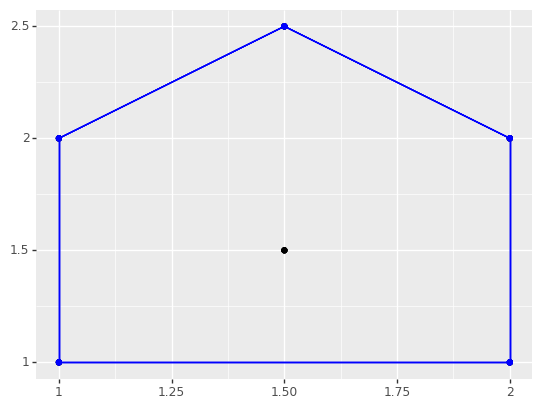

In [5]:
# we start with the SQUARE example
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('square.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

square_ch = jarvis(data) # the _ch stands for convex hull.
l = len(square_ch)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = square_ch[i].x
    y = square_ch[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

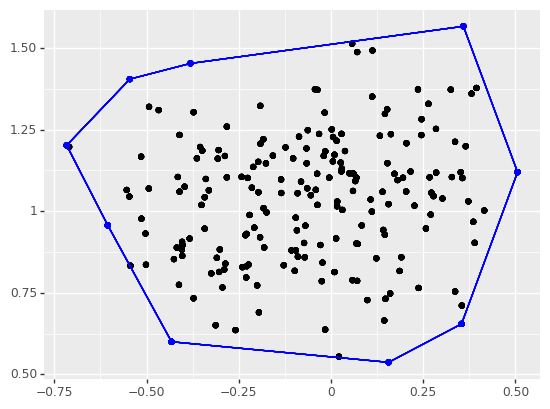

In [6]:
# the RANDOM example
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('random.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

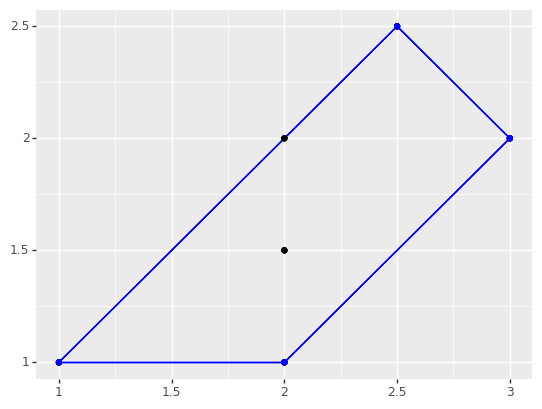

In [7]:
# the PGRAM example
# IMPORTANT NOTE: when we opened this file, we first needed to edit the file by removing some blank space after the...
# ...rows of data which was making us unable to read the file correctly. 
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('pgram.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

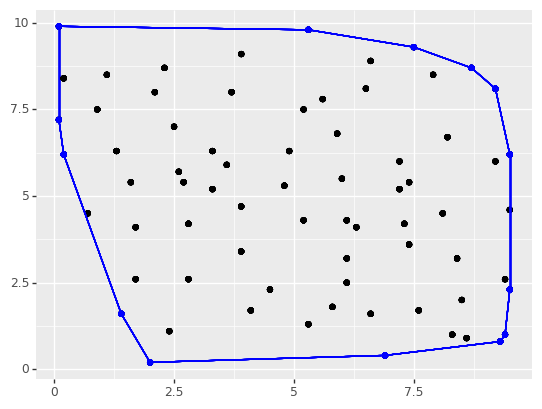

In [8]:
# the PINES example
# IMPORTANT NOTE: after opening this file, we see there are 3 columns, the first point is a number for the points...
# ... so to view this we only use the second and third column
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('pines.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[1])
        C2.append(row[2])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

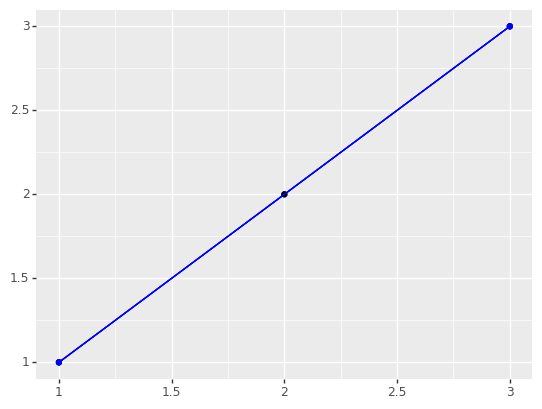

In [9]:
# the LINE example
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('line.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

<h2>Edge Cases and Correctness of Code

You are able to see in all the plots that the algorithm is giving the correct solution.

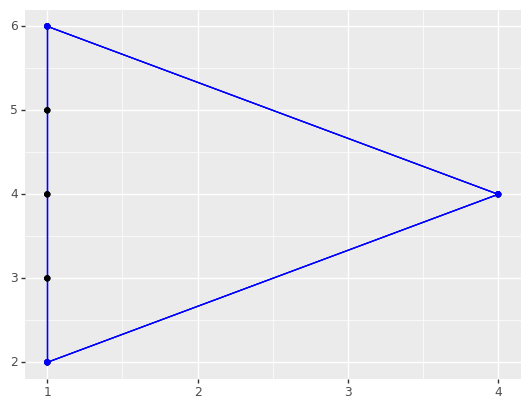

In [23]:
# the COLLINEAR POINTS ALL WITH MINIMAL X COORDINATE example
# this edge case has collinear points all with minimal x coordinate
# this edge case ensures that the algorithm is choosing the first point correctly
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('VerticalLine.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

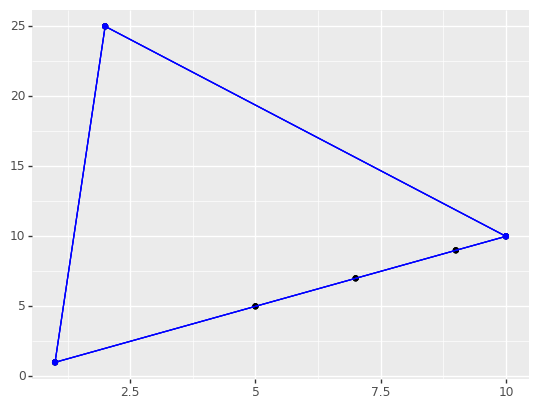

In [10]:
# the COLLINEAR_DISTANCE example
# this edge case has collinear points that (5 in a line) that vary in distance between each other
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('collinear_distance.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

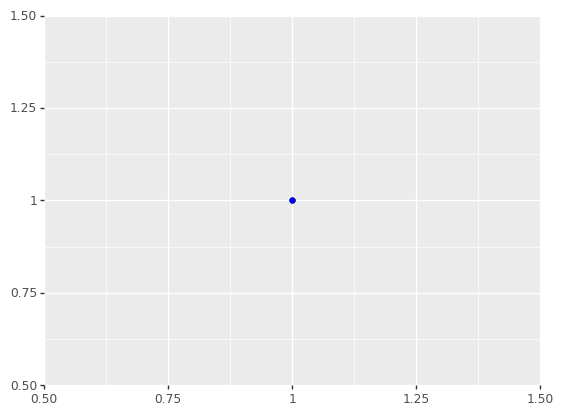

In [11]:
# the SINGLE_POINT example
# this edge case has only 1 point
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('single_point.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

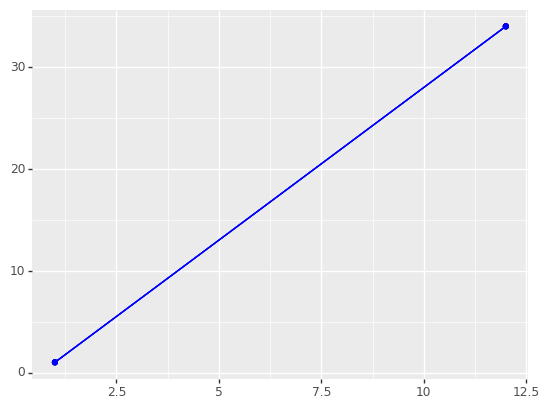

In [12]:
# the TWO POINT example
# this edge case has only 2 points
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('TwoPoint.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

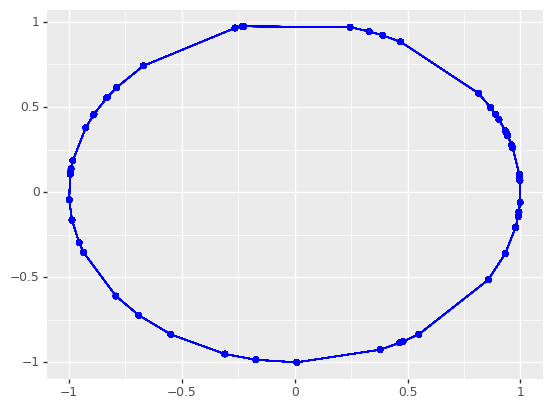

In [13]:
# the LARGE DATA WORST CASE example
# this edge case has 50 points all in the hull
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('circleFifty1.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

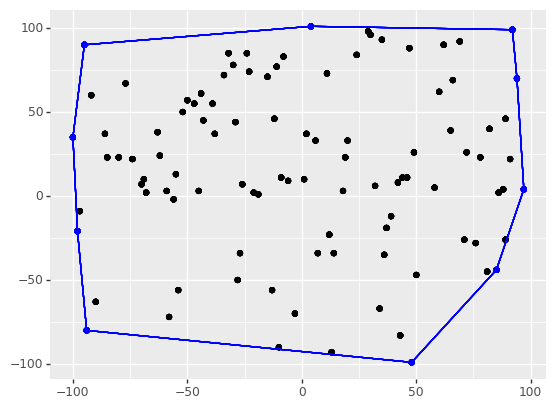

In [14]:
# the 100 RANDOM POINTS Example
# this example has 100 random points all with x and y coordinates uniformly distributed between -100 and 100
# this example is good because it also contains negative numbers
# we use the csv reader to open the file
# we turn each row in the file into a list
# then we create a list to containing all of the points in the file
# we then apply the jarvis march algorithm to the data
# we then use ggplot to investigate the output
# open the file
with open('100pointsRandom.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # initialise some empty lists to be filled with the data
    C1 = []
    C2 = []
    # read each row of the file and put the data into the lists 
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
# print(C1,C2) #uncomment to look at the points in the data

m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data

convex_h = jarvis(data) # find the convex hull using the jarvis march algorithm
l = len(convex_h)

X1 = [] # initialise an empty list to be filled with the x coordinates of data points defining the convex hull
Y1 = [] # initialise an empty list to be filled with the y coordinates of data points defining the convex hull
for i in range(l):
    x = convex_h[i].x
    y = convex_h[i].y
    X1.append(x) # fill X1 with the x coordinates of the data points
    Y1.append(y) # fill Y1 with the y coordinates of the data points

df = pd.DataFrame({"X" : X1,"Y" : Y1}) # create a data frame for the points

#create a plot containing the segment from the first point in the hull to the last
p = ggplot(df,aes(x=X1,y=Y1)) + geom_segment(aes(x=X1[0], y=Y1[0], xend=X1[l-1], yend=Y1[l-1]), color="blue")

# add all the points in black 
for i in range(m):
    p = p + geom_point(aes(x=C1[i],y=C2[i]))

# add the vertices of the hull in blue (apart from the final vertex) and add the segments in blue
for i in range(l-1):
    p = p + geom_segment(aes(x=X1[i], y=Y1[i], xend=X1[i+1], yend=Y1[i+1]), color ="blue") + geom_point(aes(x = X1[i],y=Y1[i]), color ="blue")

# add the final vertex of the hull in blue
p = p + geom_point(aes(x = X1[l-1],y=Y1[l-1]), color ="blue")

# view the result!
print(p)

<h2>Benchmarking Code

We time the algorithm on 5 of the worst case scenarios (where all the points are in the hull) with 10 points and again we time the algorithm on 5 of the worst case scenarios with 50 points and see how this time changes. 

Then we time the algorithm on 10 data sets of 10 random points (with x and y coordinates uniform between 0 and 100) and then time the algorithm again on 10 data sets of 50 random points (with x and y coordinates uniform between 0 and 100) and see how the time changes. 

In [15]:
import time # will be used to help record the run time

In [16]:
# we first time the algorithm on 5 data sets of the worst case scenarios with 10 points
# we open the csv files one at a time
# we convert the csv files to list of points
# we time the algorithm on that list
# then we do the same for the next csv file etc
# finally we find the average time for those scenarios

with open('circleTen1.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t1 = toc-tic
print(t1)

with open('circleTen2.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t2 = toc-tic
print(t2)

with open('circleTen3.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t3 = toc-tic
print(t3)

with open('circleTen4.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t4 = toc-tic
print(t4)

with open('circleTen5.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t5 = toc-tic
print(t5)

t = (t1+t2+t3+t4+t5)/5
print(t)

0.0006966369692236185
0.0006077459547668695
0.0006235659820958972
0.0006741160177625716
0.0005003139958716929
0.00062047578394413


We record the mean time taken for the worst case scenario with 10 data points to be 0.0005064177908934653

In [17]:
# we first time the algorithm on 5 data sets of the worst case scenarios with 50 points
# we open the csv files one at a time
# we convert the csv files to list of points
# we time the algorithm on that list
# then we do the same for the next csv file etc
# finally we find the average time for those scenarios

with open('circleFifty1.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t1 = toc-tic
print(t1)

with open('circleFifty2.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t2 = toc-tic
print(t2)

with open('circleFifty3.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t3 = toc-tic
print(t3)

with open('circleFifty4.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t4 = toc-tic
print(t4)

with open('circleFifty5.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t5 = toc-tic
print(t5)

t = (t1+t2+t3+t4+t5)/5
print(t)

0.01145543996244669
0.010933100944384933
0.010277177963871509
0.010985885048285127
0.011644554033409804
0.011059231590479612


We record the mean time taken for the worst case scenario with 10 data points to be 0.013182738004252315. This is slightly longer than we would expect, as we would expect it to be 5* 5 = 25 times as slow, but it is longer than this. 

The code for the mean time taken for the algorithm on 10 data sets of 10 random points (with x and y coordinates uniform between 0 and 100) and the code for the mean time taken for the algorithm on 10 data sets of 50 random points (with x and y coordinates uniform between 0 and 100) is below the 5R's section (moved to the bottom to save space). However, these are the results: 

The mean time taken for the algorithm on 10 data sets of 10 random points (with x and y coordinates uniform between 0 and 100) was 0.00030450697522610426

The mean time taken for the algorithm on 10 data sets of 50 random points (with x and y coordinates uniform between 0 and 100) was 0.002140214026439935

We see that again this scaled about as we would expect (less than 25 times as slow) when multiplying the number of points by 5. Note also in the cases of 50 points this is about 50 times faster than an example worst case scenario. 

<h2>Review considering the 5Rs

Replicable: 9/10 regarding using the algorithm, 5/10 regarding the replicating the benchmarking. Provided another user has the same python system as me and installs the same packages then an independent party can replicate the results of this algorithm. Also, the description of what a convex hull is and the method the algorithm uses is simple enough for someone else to construct their own algorithm so they can create their own algorithm/example data sets to test this algorithm on and replicate the results of the algorithm. Replicating the benchmarking is much lower, anyone can run the code that does the benchmarking but nobody will get the same results as me because it depends on the system and what is running on the system currently, the temperature of the system at that time etc, there are too many variables to make that repeatable. 

Re-runnable: 10/10. The code can all be re-run using another system, provided they download the same version of python. The only things that may change are the timings of the code because different systems will perform differently. Furthermore, there is no stochasticity in any of the calculations/datasets so the algorithm should consistently produce the same output if re run. 

Repeatable: 9/10 regarding using the algorithm, 2/10 regarding the replicating the benchmarking. As explained above, there is no randomness in the system so the algorithm should consistently produce the same output if re-run. Even if the order of the data as an input changes, because we always start with the left-most lowest point, the output will always be the same. The only results that may not be repeatable are the timings of the code, as this depends on the system and what is running on the system at that specific time. 

Reproducible: 9/10 regarding using the algorithm, 3/10 regarding the replicating the benchmarking, as explained previously, the outputs of the code are reproducible apart from the timing of the code as a different system will produce different outputs for this, however they can reproduce the test themselves and should get similar (but not identical) results.

Reusable: 7/10. The vector class has been added inside the function, so to apply the function elsewhere you only need to copy the point class and the function with little to no hassle. The current output of the function is a list of points, however this could be very easily edited to output two lists (one of x coordinates and one of y coordinates), which may be more user friendly (depending on the application, perhaps could survey users to see which they would find better on average). There are lots of comments to explain what each section of code is doing if someone wishes to edit the code slightly. 

This code can also be used on other data sets by simply reading them in in a similar manner as explained above. However, the data would need to be in the form of 2 columns (a column of x coordinates and column of y coordinates). The code could be made easier to be reused by making it more flexible with inputs. 

In [18]:
# we now time the algorithm on 10 data sets of 10 points with x and y coordinates uniformly distributed
# ...between 0 and 100
# we open the csv files one at a time
# we convert the csv files to list of points
# we time the algorithm on that list
# then we do the same for the next csv file etc
# finally we find the average time for those scenarios

with open('testTen1.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t1 = toc-tic
print(t1)

with open('testTen2.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t2 = toc-tic
print(t2)

with open('testTen3.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t3 = toc-tic
print(t3)

with open('testTen4.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t4 = toc-tic
print(t4)

with open('testTen5.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t5 = toc-tic
print(t5)

with open('testTen6.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t6 = toc-tic
print(t6)

with open('testTen7.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t7 = toc-tic
print(t7)

with open('testTen8.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t8 = toc-tic
print(t8)

with open('testTen9.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t9 = toc-tic
print(t9)

with open('testTen10.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t10 = toc-tic
print(t10)

t = (t1+t2+t3+t4+t5+t6+t7+t8+t9+t10)/10

0.0004107339773327112
0.0003725190181285143
0.00031098496401682496
0.0003426700131967664
0.00045111001236364245
0.00030477700056508183
0.0003013110253959894
0.00033305800752714276
0.0003145950031466782
0.00030295102624222636


In [19]:
# we now time the algorithm on 10 data sets of 50 points with x and y coordinates uniformly distributed
# ...between 0 and 100
# we open the csv files one at a time
# we convert the csv files to list of points
# we time the algorithm on that list
# then we do the same for the next csv file etc
# finally we find the average time for those scenarios

with open('test1.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t1 = toc-tic
print(t1)

with open('test2.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t2 = toc-tic
print(t2)

with open('test3.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t3 = toc-tic
print(t3)

with open('test4.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t4 = toc-tic
print(t4)

with open('test5.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t5 = toc-tic
print(t5)

with open('test6.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t6 = toc-tic
print(t6)

with open('test7.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t7 = toc-tic
print(t7)

with open('test8.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t8 = toc-tic
print(t8)

with open('test9.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t9 = toc-tic
print(t9)

with open('test10.csv',mode='r') as csv_file :
    csv_reader = csv.reader(csv_file, delimiter=',')
    C1 = []
    C2 = []
    for row in csv_reader :
        C1.append(row[0])
        C2.append(row[1])
m = len(C1) # find the number of points in the data
data = [] # initialise an empty list to be filled with the data points
for i in range(m):
    p = point(float(C1[i]), float(C2[i]))
    data.append(p) # appends points to the list from the data
tic = time.perf_counter()
convex_h = jarvis(data) # record the time for the algorithm to run
toc = time.perf_counter()
t10 = toc-tic
print(t10)

t = (t1+t2+t3+t4+t5+t6+t7+t8+t9+t10)/10

0.0024462479632347822
0.002860614040400833
0.0022147250128909945
0.002264084992930293
0.0027562759933061898
0.00213034194894135
0.0027939840219914913
0.002261031011585146
0.00274983502458781
0.0020903469994664192


Bonus stuff: If given a set of data points that form a convex hull, however the hull contains data points that are collinear, the following function can remove the points that are collinear, leaving the correct hull: 

In [20]:
def correct_hull(convex_hull):
    l = len(convex_hull) # compute the length of the convex hull
    
    delete_list = [] # initialise an empty list to contain the indices of points we need to delete
    if l > 2:
        for i in range(l) :
            j = (i+1)%l # j is the point after i
            k = (i+2)%l # k is the point after j
            u = vector2d(convex_hull[i],convex_hull[j])
            v = vector2d(convex_hull[j],convex_hull[k])
            if vector2d.parallel(u,v) :
                delete_list.append(j)
    
    d = len(delete_list) # compute how many points we need to delete
    for i in range(d) :
        del convex_hull[delete_list[i]] # deletes the point from the hull that is not necessary         

    correct_hull = convex_hull
        
    return correct_hull

In [2]:
print("Message")

Message
